In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samishiraz00","key":"badece8ee322ce830cba08599aca656a"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:24<00:00, 108MB/s] 
100% 2.29G/2.29G [00:24<00:00, 102MB/s]


In [6]:
from zipfile import ZipFile
file_name = "chest-xray-pneumonia.zip"

with ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("Done")

Done


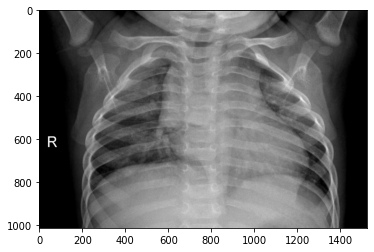

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/chest_xray/chest_xray/train/NORMAL/IM-0128-0001.jpeg")
plt.imshow(img)


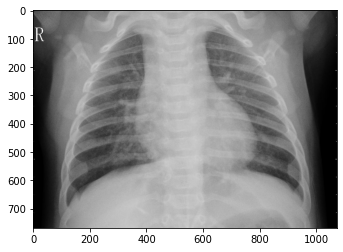

In [9]:
img = cv2.imread("/content/chest_xray/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg")
plt.imshow(img)

In [64]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras import models, layers
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [11]:
Image_size = [224,224]

train_path = "/content/chest_xray/chest_xray/train"
valid_path = "/content/chest_xray/chest_xray/test"

In [12]:
vgg = VGG16(input_shape = Image_size + [3], weights = "imagenet", include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [13]:
for layer in vgg.layers:
  layer.trainable = False

In [17]:
folder = glob("/content/chest_xray/chest_xray/train/*")

In [21]:
#training model

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', input_shape=(vgg.output, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(len(folder), activation='softmax'))

In [28]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',)

testing_set = test_datagen.flow_from_directory(valid_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [84]:
r = model.fit_generator(training_set,
                    validation_data = testing_set,
                    epochs = 5,
                    steps_per_epoch = len(training_set),
                    validation_steps = len(testing_set)
                    )

Epoch 1/5
163/163 [==============================] - 177s 1s/step - loss: 0.2667 - accuracy: 0.8857 - val_loss: 0.7851 - val_accuracy: 0.7244
Epoch 2/5
163/163 [==============================] - 180s 1s/step - loss: 0.3091 - accuracy: 0.8752 - val_loss: 0.3335 - val_accuracy: 0.8397
Epoch 3/5
163/163 [==============================] - 180s 1s/step - loss: 0.2723 - accuracy: 0.8886 - val_loss: 0.4829 - val_accuracy: 0.7708
Epoch 4/5
163/163 [==============================] - 180s 1s/step - loss: 0.2594 - accuracy: 0.8944 - val_loss: 0.5515 - val_accuracy: 0.7804
Epoch 5/5
163/163 [==============================] - 180s 1s/step - loss: 0.2650 - accuracy: 0.8869 - val_loss: 0.3811 - val_accuracy: 0.8349


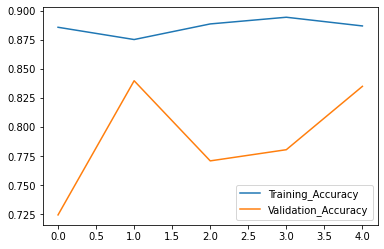

In [85]:
plt.plot(r.history['accuracy'], label="Training_Accuracy")
plt.plot(r.history['val_accuracy'], label="Validation_Accuracy")
plt.legend()
plt.show()

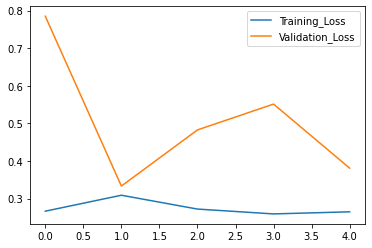

In [86]:
plt.plot(r.history['loss'], label="Training_Loss")
plt.plot(r.history['val_loss'], label="Validation_Loss")
plt.legend()
plt.show()